<a href="https://colab.research.google.com/github/vivek12367/Clicks_prediction/blob/main/Regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
# Properties data
data = pd.read_csv('property_data_set.csv', parse_dates=['activation_date'], dayfirst=True)

# Data containing the timestamps of interaction on the properties
interaction = pd.read_csv('property_interactions.csv', parse_dates=['request_date'], dayfirst=True)

# Data containing photo counts of properties
pics = pd.read_table('property_photos.tsv')

In [5]:
print('Property data Shape', data.shape)
print('Pics data Shape',pics.shape)
print('Interaction data Shape',interaction.shape)

Property data Shape (28888, 21)
Pics data Shape (28888, 2)
Interaction data Shape (170611, 2)


In [6]:
data.sample(2)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
4116,ff80818154809c6001548f7fded340f7,BHK2,2017-03-16 12:56:00,2,2,3.0,SEMI_FURNISHED,0,12.945786,77.486801,...,0,Jnana Ganga Nagar,TWO_WHEELER,2,1200,0,560056.0,10000,100000,IF
2288,ff80818151ae8c4e0151b37eef3a2dc2,BHK1,2017-03-18 18:30:00,1,0,3.0,NOT_FURNISHED,0,12.870878,77.655994,...,0,Parappana Agrahara,TWO_WHEELER,5,450,0,560068.0,7000,25000,IF


In [7]:
interaction.sample(2)

,property_id,request_date
33885,ff808181557decb501558204ffc81ea2,2017-03-02 11:33:27
143558,ff8081815ab8801e015ac5a9d8ee207a,2017-04-07 12:41:51


# Data Engineering

In [8]:
pics.head()


,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [9]:
pics.dtypes

,0
property_id,object
photo_urls,object


In [10]:
pics.isna().sum()

,0
property_id,0
photo_urls,11022


In [13]:
text_before = pics['photo_urls'][0]
print('Before Correction: \n\n', text_before)
# Try to replace corrupted values then convert to json
text_after = text_before.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","')
print("\n\nAfter correction and converted to json: \n\n", json.loads(text_after))

Before Correction: 

 [{\title\":\"Balcony\",\"name\":\"IMG_20131006_120837.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_65149_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_65149_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_65149_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_65149_large.jpg\"},\"displayPic\":false},{\"title\":\"Bathroom\",\"name\":\"IMG_20131006_120734.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_63511_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_63511_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_63511_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_63511_large.jpg\"},\"displayPic\":false},{\"title\":\"Bedroom\",\"name\":\"IMG_20131006_120643.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_16708_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_16708_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20

In [14]:
# Function to correct corrupted json and get count of photos
def correction (x):
    # if value is null put count with 0 photos
    if x is np.nan or x == 'NaN':
        return 0
    else :
        # Replace corrupted values then convert to json and get count of photos
        return len(json.loads( x.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","') ))

# Apply Correction Function
pics['photo_count'] = pics['photo_urls'].apply(correction)

In [15]:
# Delete photo_urls column
del pics['photo_urls']
# Sample of Pics data
pics.sample(5)


,property_id,photo_count
6011,ff8081815752a21b01575ae7e9fa6980,6
22028,ff8081815ab0b66a015ab20807474327,2
18642,ff8081815a87b712015a88e9c52a463c,10
27161,ff8081815b00ae89015b044939217919,5
14695,ff8081815a4b92df015a4b9820c40664,4


# Number of Interaction Within 3 Days

In [16]:
# Merge data with interactions data on property_id
num_req = pd.merge(data, interaction, on ='property_id')[['property_id', 'request_date', 'activation_date']]
num_req.head(5)

,property_id,request_date,activation_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00


In [18]:
# Ensure columns are datetime
num_req['request_date'] = pd.to_datetime(num_req['request_date'])
num_req['activation_date'] = pd.to_datetime(num_req['activation_date'])

# Calculate the difference in days
num_req['request_day'] = (num_req['request_date'] - num_req['activation_date']) / np.timedelta64(1, 'D')


In [19]:
num_req.head(1)

,property_id,request_date,activation_date,request_day
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00,1.12956


In [20]:
# Get a count of requests in the first 3 days
num_req_within_3d = num_req[num_req['request_day'] < 3].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 3 days
num_req_within_3d = num_req_within_3d.rename({'request_day':'request_day_within_3d'},axis=1)
# Dataset with the number of requests within 3 days
num_req_within_3d

,property_id,request_day_within_3d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,3
2,ff808081470c645401470fb03f5800a6,15
3,ff808081470c6454014715eaa5960281,5
4,ff808081474aa867014771a0298f0aa6,25
...,...,...
13205,ff8081815b1fdda8015b1fdf585c004b,2
13206,ff8081815b1fdda8015b1fe675ae0146,5
13207,ff8081815b1fdda8015b1ffee8a305d2,2
13208,ff8081815b200540015b20158b0103c9,2


In [21]:
num_req_within_3d['request_day_within_3d'].value_counts()[:10]

,count
request_day_within_3d,
1,5940
2,2741
3,1579
4,887
5,583
6,373
7,246
8,186
9,148


In [22]:
def divide(x):
    if x in [1,2]:
        return 'cat_1_to_2'
    elif x in [3,4,5]:
        return 'cat_3_to_5'
    else:
        return 'cat_above_5'

In [23]:
num_req_within_3d['categories_3day'] = num_req_within_3d['request_day_within_3d'].apply(divide)
num_req_within_3d.head(3)

,property_id,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,3,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,15,cat_above_5


In [24]:
num_req_within_3d['categories_3day'].value_counts()

,count
categories_3day,
cat_1_to_2,8681
cat_3_to_5,3049
cat_above_5,1480


# Number of Interaction Within 7 Days

In [25]:
# Get a count of requests in the first 7 days
num_req_within_7d = num_req[num_req['request_day'] < 7].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 7 days
num_req_within_7d = num_req_within_7d.rename({'request_day':'request_day_within_7d'},axis=1)
# Dataset with the number of requests within 7 days
num_req_within_7d

,property_id,request_day_within_7d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,5
2,ff808081470c645401470fb03f5800a6,22
3,ff808081470c6454014715eaa5960281,7
4,ff808081474aa867014771a0298f0aa6,52
...,...,...
17381,ff8081815b1fdda8015b1fe675ae0146,8
17382,ff8081815b1fdda8015b1ffee8a305d2,3
17383,ff8081815b1fdda8015b2000369205fd,2
17384,ff8081815b200540015b20158b0103c9,2


In [26]:
num_req_within_7d['request_day_within_7d'].value_counts()[:10]

,count
request_day_within_7d,
1,5856
2,3381
3,2118
4,1421
5,1047
6,735
7,597
8,373
9,323


In [27]:
num_req_within_7d['categories_7day'] = num_req_within_7d['request_day_within_7d'].apply(divide)
num_req_within_7d.head(3)

,property_id,request_day_within_7d,categories_7day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5


In [28]:
num_req_within_7d['categories_7day'].value_counts()

,count
categories_7day,
cat_1_to_2,9237
cat_3_to_5,4586
cat_above_5,3563


# Merge Data

In [29]:
data.sample()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
18523,ff8081815a8540bc015a855b838a0631,BHK2,2017-03-03 10:47:00,2,1,2.0,SEMI_FURNISHED,0,13.012021,77.634625,...,0,Lingarajapuram,TWO_WHEELER,12,1200,0,560084.0,13500,150000,IF


In [30]:
pics.sample()

,property_id,photo_count
9420,ff80818159f48de30159f5476577144a,6


In [31]:
num_req_within_3d.sample()

,property_id,request_day_within_3d,categories_3day
6090,ff8081815a2d442b015a2d504cd50f5f,4,cat_3_to_5


In [32]:
num_req_within_7d.sample()

,property_id,request_day_within_7d,categories_7day
1326,ff808181514866a70151486948950024,2,cat_1_to_2


In [33]:
print(num_req_within_3d.shape)
print(num_req_within_7d.shape)

(13210, 3)
(17386, 3)


In [34]:
label_data = pd.merge(num_req_within_7d, num_req_within_3d, on ='property_id' , how='left')
label_data.head(3)

,property_id,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5,15.0,cat_above_5


In [35]:
label_data.isna().sum()

,0
property_id,0
request_day_within_7d,0
categories_7day,0
request_day_within_3d,4176
categories_3day,4176


In [36]:
data_with_pics = pd.merge(data, pics, on ='property_id', how = 'left')
data_with_pics.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12


In [38]:
df = pd.merge(data_with_pics, label_data, on ='property_id')
df.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,1,560076.0,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,1,560016.0,20000,150000,AP,0,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,0,560075.0,15000,75000,AP,12,22,cat_above_5,15.0,cat_above_5


# Exploratory Data Analysis

In [39]:
df.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,1,560076.0,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,1,560016.0,20000,150000,AP,0,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,0,560075.0,15000,75000,AP,12,22,cat_above_5,15.0,cat_above_5
3,ff808081470c6454014715eaa5960281,BHK3,2017-03-09 22:16:00,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,0,560076.0,17000,150000,AP,9,7,cat_above_5,5.0,cat_3_to_5
4,ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:00,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,0,560048.0,6500,40000,IF,7,52,cat_above_5,25.0,cat_above_5


In [40]:
df['locality'].value_counts()

,count
locality,
Whitefield,517
JP Nagar,415
Marathahalli,414
HSR Layout,380
Electronic City,341
...,...
Vayalikaval,1
"Prerana Tranquil, Kalkere Main Rd, Jayanti Nagar, Horamavu, Bengaluru, Karnataka 560016, India",1
"JS Nagar, Bengaluru, Karnataka, India",1


In [41]:
df.columns

Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type', 'photo_count', 'request_day_within_7d',
       'categories_7day', 'request_day_within_3d', 'categories_3day'],
      dtype='object')

In [42]:
dataset = df.drop(['property_id', 'activation_date' ,'latitude', 'longitude', 'pin_code','locality'  ] , axis=1)

In [43]:
# Some info about all columns
print('Column : Num. of null values')
print(dict(dataset.isna().sum()))
print('\n\n')
print('Column : data type')
print(dict(dataset.dtypes))

Column : Num. of null values
{'type': np.int64(0), 'bathroom': np.int64(0), 'floor': np.int64(0), 'total_floor': np.int64(23), 'furnishing': np.int64(0), 'gym': np.int64(0), 'lease_type': np.int64(0), 'lift': np.int64(0), 'parking': np.int64(0), 'property_age': np.int64(0), 'property_size': np.int64(0), 'swimming_pool': np.int64(0), 'rent': np.int64(0), 'deposit': np.int64(0), 'building_type': np.int64(38), 'photo_count': np.int64(0), 'request_day_within_7d': np.int64(0), 'categories_7day': np.int64(0), 'request_day_within_3d': np.int64(4176), 'categories_3day': np.int64(4176)}



Column : data type
{'type': dtype('O'), 'bathroom': dtype('int64'), 'floor': dtype('int64'), 'total_floor': dtype('float64'), 'furnishing': dtype('O'), 'gym': dtype('int64'), 'lease_type': dtype('O'), 'lift': dtype('int64'), 'parking': dtype('O'), 'property_age': dtype('int64'), 'property_size': dtype('int64'), 'swimming_pool': dtype('int64'), 'rent': dtype('int64'), 'deposit': dtype('int64'), 'building_type'

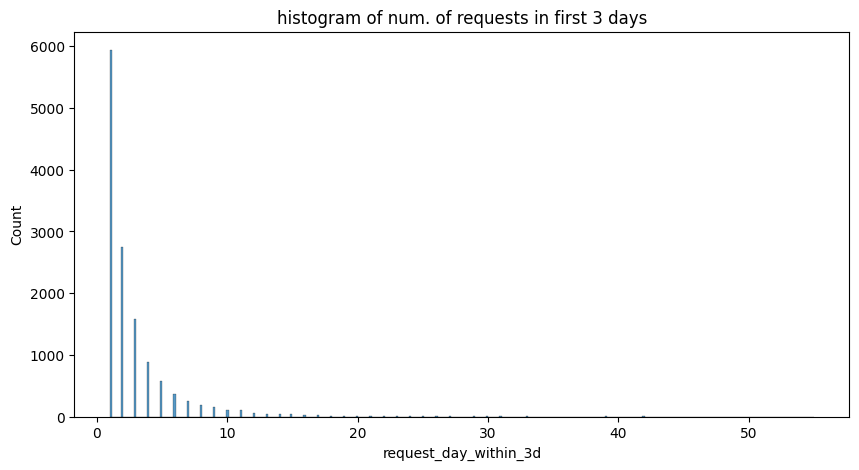

In [44]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

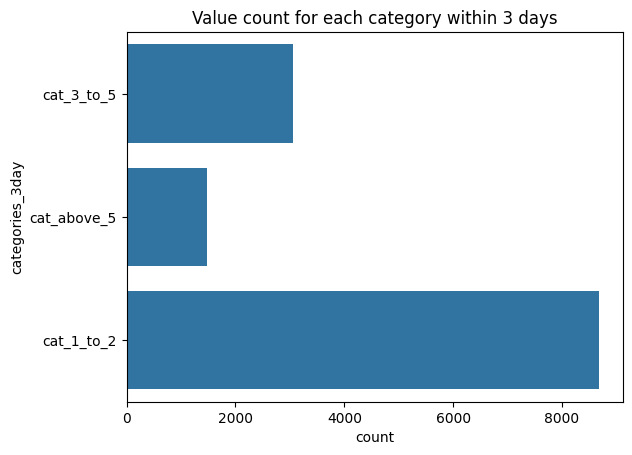

In [45]:
sns.countplot(y=dataset.categories_3day)
plt.title('Value count for each category within 3 days')
plt.show()

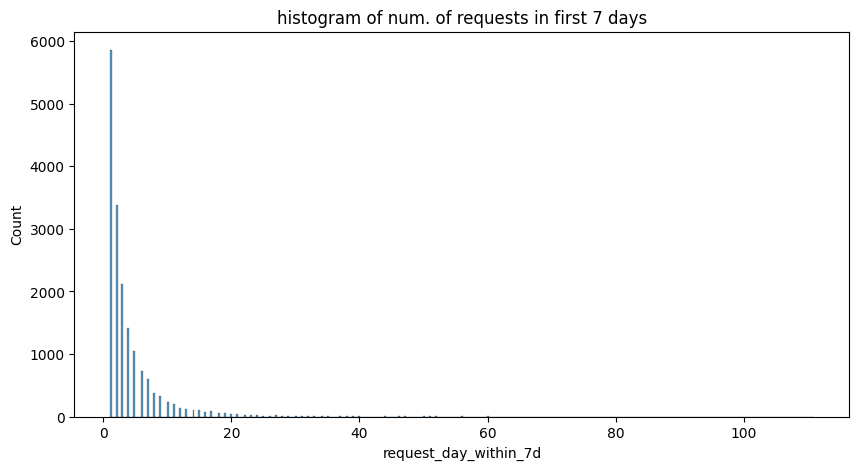

In [46]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

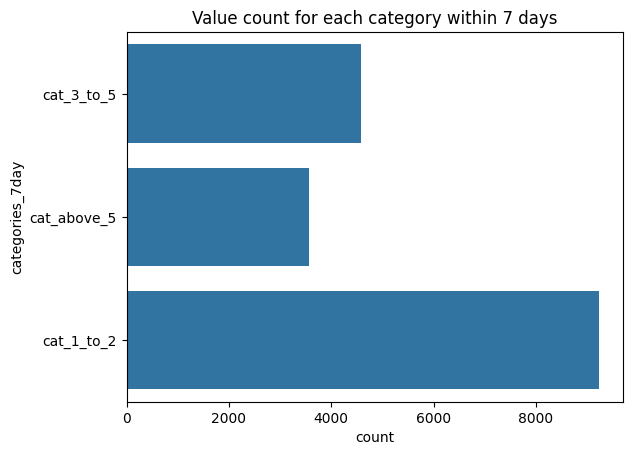

In [47]:
sns.countplot(y=dataset.categories_7day)
plt.title('Value count for each category within 7 days')
plt.show()

In [48]:
# Get categorical columns
df_cat = dataset.select_dtypes(include=['object'])
# Get numeric columns
df_num = dataset.select_dtypes(exclude=['object'])

In [49]:
print("Categorical Columns : \n",list(df_cat.columns) )
print("Numeric Columns : \n",list(df_num.columns) )

Categorical Columns : 
 ['type', 'furnishing', 'lease_type', 'parking', 'building_type', 'categories_7day', 'categories_3day']
Numeric Columns : 
 ['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count', 'request_day_within_7d', 'request_day_within_3d']


In [50]:
df_cat.sample(2)

,type,furnishing,lease_type,parking,building_type,categories_7day,categories_3day
10136,BHK2,SEMI_FURNISHED,ANYONE,NONE,AP,cat_3_to_5,cat_1_to_2
12403,BHK2,SEMI_FURNISHED,ANYONE,BOTH,AP,cat_1_to_2,NaN


In [51]:
df_num.sample(2)

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
2338,1,0,1.0,0,0,8,1200,0,14000,140000,1,4,1.0
3949,1,3,3.0,0,0,9,480,1,8500,85000,6,11,6.0


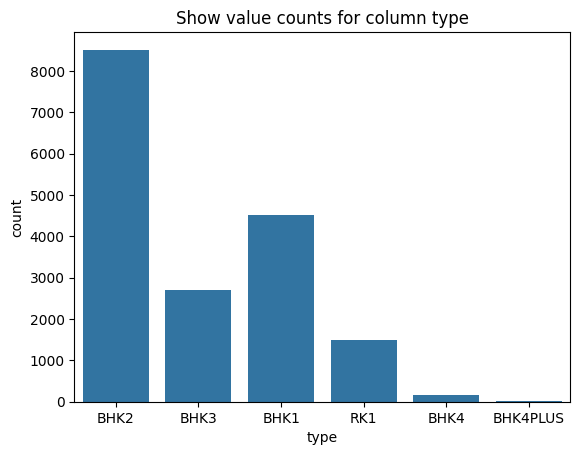

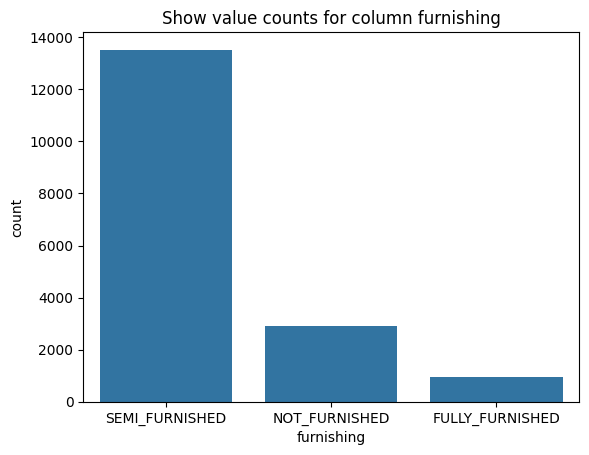

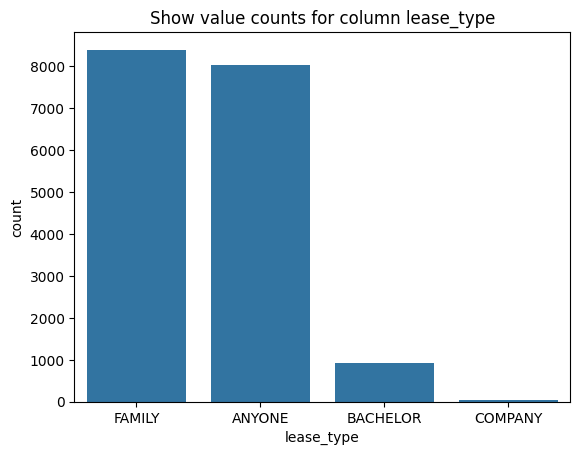

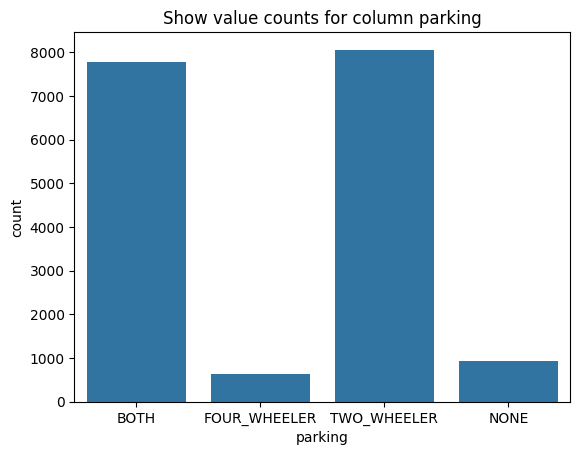

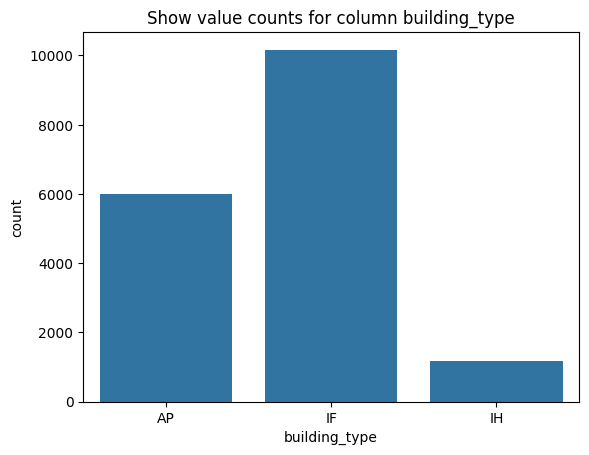

In [52]:
for col in df_cat.columns[:-2]:
    sns.countplot(x = col,

            data = dataset
                 )
    plt.title(f'Show value counts for column {col}')

    # Show the plot
    plt.show()

In [53]:
df_num.head()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
0,1,3,4.0,1,1,2,850,1,12000,120000,7,4,4.0
1,2,4,11.0,1,1,1,1233,1,20000,150000,0,5,3.0
2,2,0,4.0,1,1,0,1200,0,15000,75000,12,22,15.0
3,2,3,4.0,0,0,1,1300,0,17000,150000,9,7,5.0
4,1,1,2.0,0,0,4,450,0,6500,40000,7,52,25.0


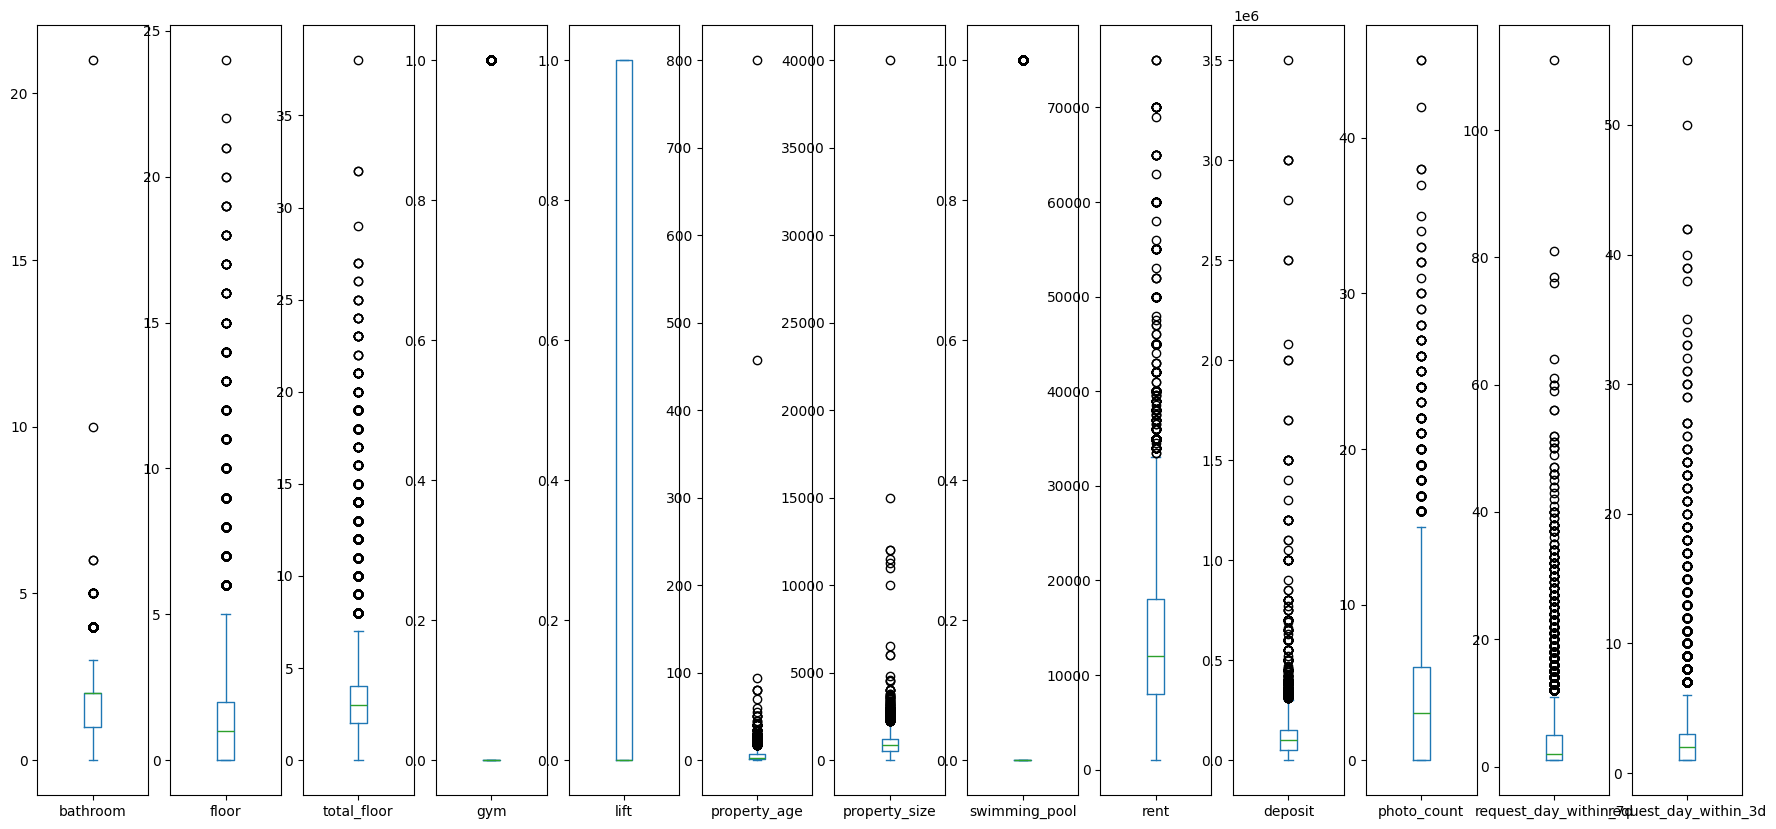

In [54]:
df_num.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

In [55]:
df_num.describe()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
count,17386.000000,17386.000000,17363.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,1.738600e+04,17386.000000,17386.000000,13210.000000
mean,1.702692,1.726101,3.382077,0.150063,0.265156,4.789141,912.091510,0.126769,13822.809847,1.145386e+05,3.803635,4.013632,2.802801
std,0.716630,2.041864,3.040158,0.357144,0.441429,8.781275,608.803608,0.332723,8272.442456,1.167101e+05,4.231098,5.050688,3.187711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,507.000000,0.000000,8000.000000,5.000000e+04,0.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,0.000000,0.000000,3.000000,875.000000,0.000000,12000.000000,1.000000e+05,3.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,0.000000,1.000000,7.000000,1200.000000,0.000000,18000.000000,1.500000e+05,6.000000,5.000000,3.000000
max,21.000000,24.000000,38.000000,1.000000,1.000000,800.000000,40000.000000,1.000000,75000.000000,3.500000e+06,45.000000,111.000000,55.000000


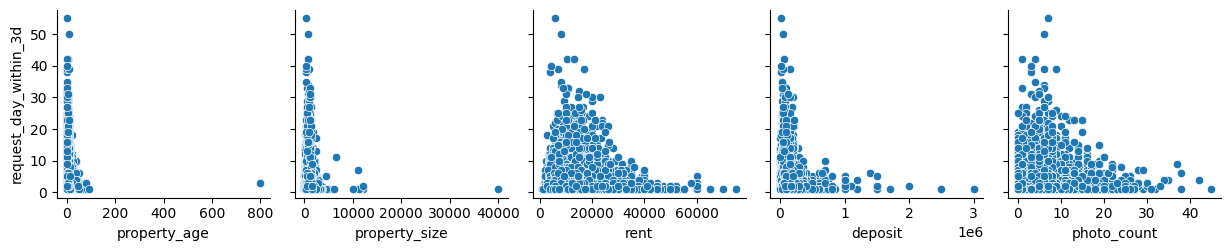

In [56]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d']

                  )
plt.show()

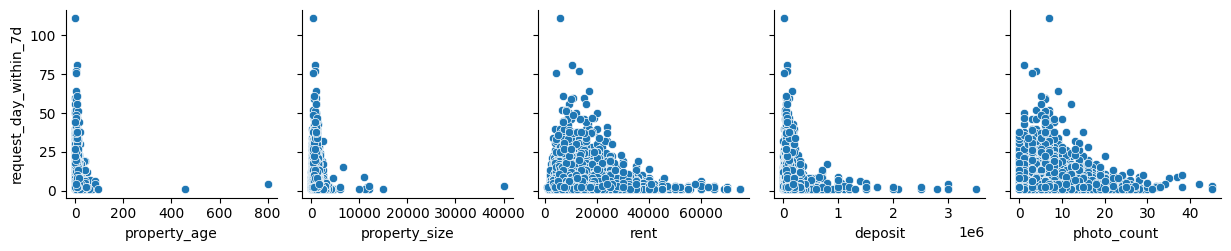

In [57]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d']

                  )
plt.show()

# Feature Engineering


In [58]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 2 * iqr
    fence_high = q3 + 2 * iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_high) & (df_in[col_name] >= fence_low)]
    return df_out

In [59]:
df_num.columns

Index(['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age',
       'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count',
       'request_day_within_7d', 'request_day_within_3d'],
      dtype='object')

In [60]:
df = dataset.copy()
for col in df_num.columns:
    if col in ['gym', 'lift', 'swimming_pool',  'request_day_within_3d', 'request_day_within_7d']:
        continue

    df = remove_outlier(df , col)

In [61]:
def capping_for_3days(x):
    num = 10
    if x > num:
        return num
    else :
        return x
def capping_for_7days(x):
    num = 20
    if x > num:
        return num
    else :
        return x

In [62]:
df['request_day_within_3d_capping'] = df['request_day_within_3d'].apply(capping_for_3days)
df['request_day_within_7d_capping'] = df['request_day_within_7d'].apply(capping_for_7days)

In [63]:
df['request_day_within_3d_capping'].value_counts()

,count
request_day_within_3d_capping,
1.0,5115
2.0,2403
3.0,1404
4.0,795
5.0,532
10.0,495
6.0,339
7.0,228
8.0,168


In [64]:
df['request_day_within_7d_capping'].value_counts()[:10]

,count
request_day_within_7d_capping,
1,4934
2,2923
3,1848
4,1264
5,937
6,663
7,549
8,330
20,319


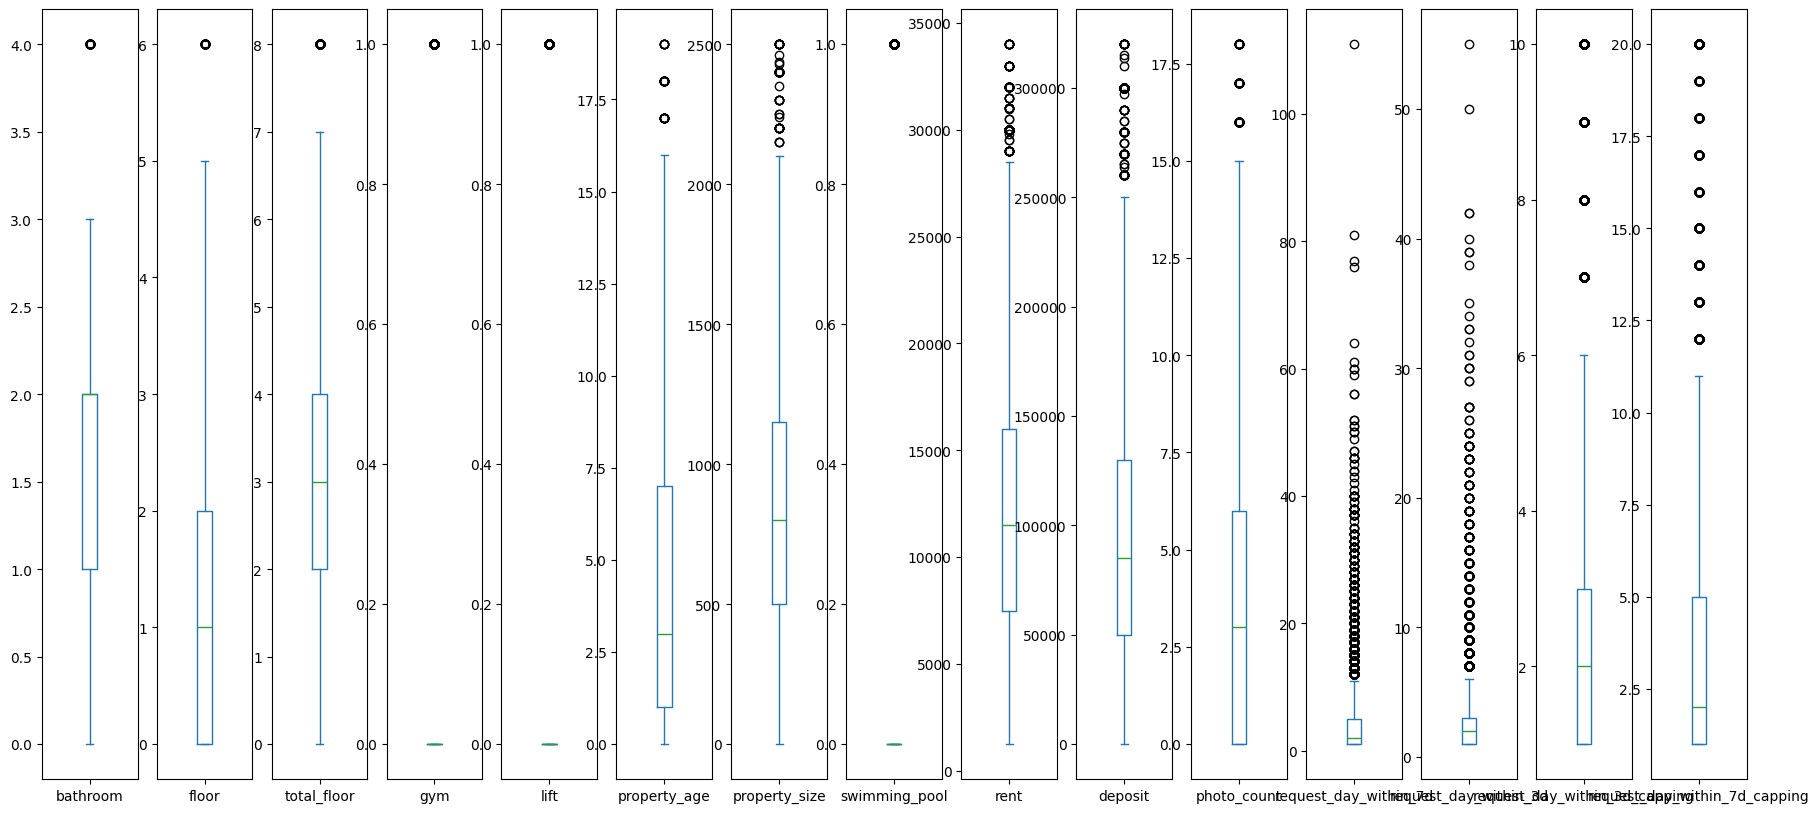

In [65]:
# Box Plot after removing some values
df.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

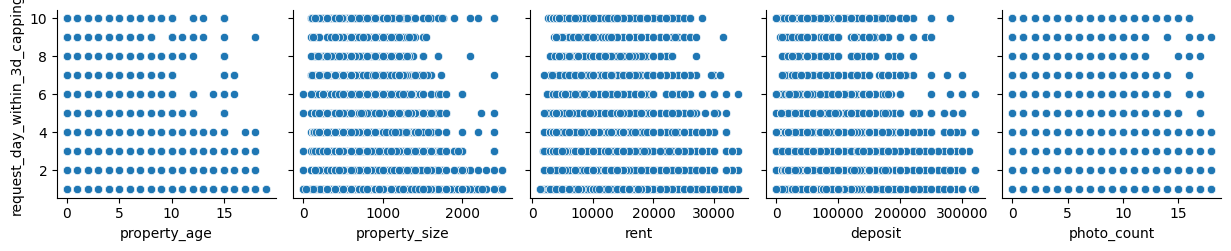

In [66]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d_capping']
                  )
plt.show()

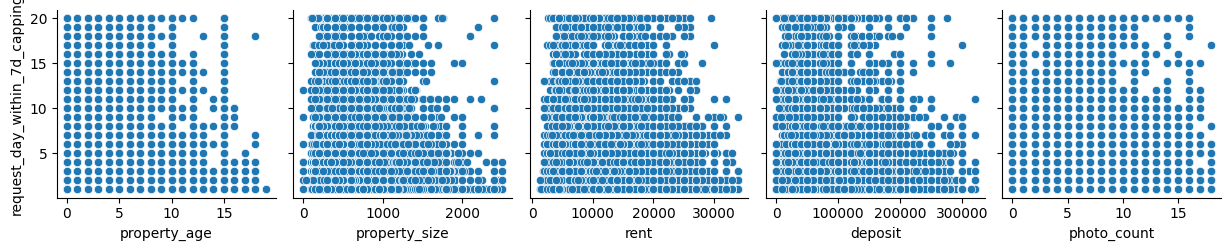

In [67]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d_capping']

                  )
plt.show()

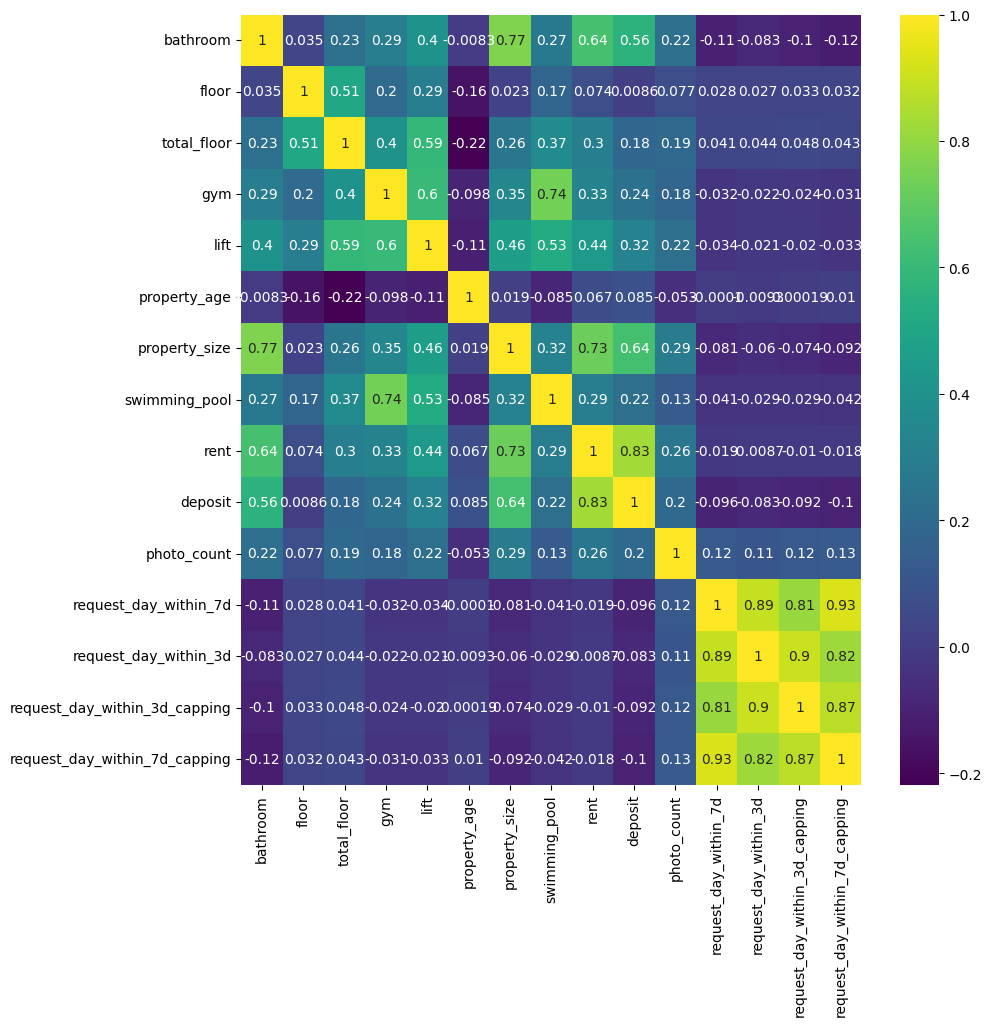

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
plt.show()

# One-Hot Encoding

In [71]:
df.sample(5)

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,...,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
2401,RK1,1,2,3.0,SEMI_FURNISHED,0,FAMILY,0,NONE,2,...,6500,50000,AP,4,4,cat_3_to_5,1.0,cat_1_to_2,1.0,4
15412,BHK2,1,0,1.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,10,...,10000,100000,IF,10,3,cat_3_to_5,3.0,cat_3_to_5,3.0,3
12027,BHK1,1,2,4.0,SEMI_FURNISHED,0,ANYONE,0,NONE,0,...,7500,25000,AP,2,2,cat_1_to_2,2.0,cat_1_to_2,2.0,2
7743,BHK2,2,1,5.0,SEMI_FURNISHED,0,FAMILY,0,TWO_WHEELER,8,...,12000,100000,IF,6,5,cat_3_to_5,3.0,cat_3_to_5,3.0,5
4349,BHK2,2,1,1.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,0,...,8000,50000,IF,10,2,cat_1_to_2,2.0,cat_1_to_2,2.0,2


In [72]:
df.columns

Index(['type', 'bathroom', 'floor', 'total_floor', 'furnishing', 'gym',
       'lease_type', 'lift', 'parking', 'property_age', 'property_size',
       'swimming_pool', 'rent', 'deposit', 'building_type', 'photo_count',
       'request_day_within_7d', 'categories_7day', 'request_day_within_3d',
       'categories_3day', 'request_day_within_3d_capping',
       'request_day_within_7d_capping'],
      dtype='object')

In [73]:
X = df.drop(['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping'] , axis=1)
x_cat_withNull= df[X.select_dtypes(include=['O']).columns]
x_remain_withNull = df[X.select_dtypes(exclude=['O']).columns]
y = df[['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping']]

In [74]:
x_remain = pd.DataFrame()
x_cat = pd.DataFrame()

In [75]:
for col in x_remain_withNull.columns:
    x_remain[col] = x_remain_withNull[col].fillna((x_remain_withNull[col].mean()))
# if we having null values in a categorical columns fill it with mode
for col in x_cat_withNull.columns:
    x_cat[col] = x_cat_withNull[col].fillna(x_cat_withNull[col].mode()[0])

In [76]:
x_remain.isna().sum()

,0
bathroom,0
floor,0
total_floor,0
gym,0
lift,0
property_age,0
property_size,0
swimming_pool,0
rent,0
deposit,0


In [77]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto' , handle_unknown='ignore')
feature_train = ohe.fit_transform(x_cat).toarray()
feature_labels = ohe.categories_

new_features = []
for i,j in zip(x_cat.columns,feature_labels):
    new_features.append(f"{i}_"+j)

feature_labels = np.array(new_features, dtype=object).ravel()
f=[]
for i in range(feature_labels.shape[0]):
    f.extend(feature_labels[i])


df_features = pd.DataFrame(feature_train, columns=f)

In [78]:
print(df_features.shape)

(15170, 20)


In [79]:
df_features.sample(3)

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH
6697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# MinMaxScaler

In [80]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = MinMaxScaler()
x_remain_scaled = sc.fit_transform(x_remain)
x_remain_scaled = pd.DataFrame(x_remain_scaled, columns=x_remain.columns)

In [81]:
y.head(1)

,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
0,4,cat_3_to_5,4.0,cat_3_to_5,4.0,4


In [82]:
data_with_3days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_3d',
                                                                                                        'request_day_within_3d_capping',
                                                                                                        'categories_3day']].reset_index(drop=True)], axis=1)

In [83]:
data_with_3days.dropna(inplace=True)
data_with_3days.shape

(11619, 34)

In [84]:
# Concatenate data after applying One-Hot Encoding
data_with_7days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_7d',
                                                                                                        'request_day_within_7d_capping',
                                                                                                        'categories_7day']].reset_index(drop=True)], axis=1)


In [85]:
data_with_7days.dropna(inplace=True)

data_with_7days.shape

(15170, 34)

# Machine Learning

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [87]:
data_with_3days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,...,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_3d,request_day_within_3d_capping,categories_3day
2322,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.210526,0.5804,0.0,0.51145,0.3125,0.388889,1.0,1.0,cat_1_to_2


In [88]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

In [89]:
# Split data to train and test sets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d'], test_size = 0.2, random_state = seed)


# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error
    rms = np.sqrt(mean_squared_error(y_test, y_pred))

    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (3.304811)
LASSO: RMS => (3.409854)
KNN: RMS => (3.568860)
CART: RMS => (4.914348)
xgb: RMS => (3.463343)


In [90]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error
    rms = np.sqrt(mean_squared_error(y_test, y_pred))

    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (2.278647)
LASSO: RMS => (2.380321)
KNN: RMS => (2.473213)
CART: RMS => (3.181372)
xgb: RMS => (2.348409)


In [91]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_3day'], test_size = 0.2, random_state = seed)

In [92]:
y['categories_3day'].value_counts()

,count
categories_3day,
cat_1_to_2,7518
cat_3_to_5,2731
cat_above_5,1370


In [93]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.65      0.99      0.79      1511
  cat_3_to_5       0.29      0.01      0.01       528
 cat_above_5       0.52      0.04      0.07       285

    accuracy                           0.65      2324
   macro avg       0.49      0.35      0.29      2324
weighted avg       0.55      0.65      0.52      2324



In [94]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.67      0.90      0.77      1511
  cat_3_to_5       0.29      0.12      0.17       528
 cat_above_5       0.31      0.08      0.12       285

    accuracy                           0.62      2324
   macro avg       0.42      0.37      0.35      2324
weighted avg       0.54      0.62      0.55      2324



In [95]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

In [96]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

In [97]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
# Create ANN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.8075
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.9971
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.3093
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.1197
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.9693
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.0940
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.8825
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.8047
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.1345
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9462
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.8175
Epoch 12/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.9537
Epoch 13/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.8347
Epoch 14/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.8146
Epoch 15/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - l

In [104]:
# Features (X)
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)

# Target (y) - Predict the number of interactions
y = data_with_3days['request_day_within_3d']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model (e.g., Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 2.060225545037292
R2 Score: 0.038738607935073666
